# Text Mining Final Project Code
## Project Title- Analyzing tweets surrounding Covid and Capitol Riots


### Loading data and libraries

In [1]:
#import required functions/libraries

import pandas as p
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import operator

In [2]:
#read in the data

claims = p.read_csv("tweets.csv")

claims[:5]

,tweet_id,text,query,user_id,user_name,follower_count,user_tweet_count,likes,retweets,location_name,latitude,longitude,user_location,date
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,1101487206840057856,nick stripe,12936,1577,255,108,NaN,NaN,NaN,NaN,2021-01-06
1,1346817043232919555,turning to labour or remainers like what would...,death rates,234694571,femi,290982,75187,877,116,NaN,NaN,NaN,NaN,2021-01-06
2,1346862193451692034,numbers of deaths are affected by population s...,death rates,1101487206840057856,nick stripe,12936,1577,213,75,NaN,NaN,NaN,NaN,2021-01-06
3,1346969461190848516,here is a list of governors who preside over s...,death rates,1346952467003568129,NaN,2,120,0,7612,NaN,NaN,NaN,NaN,2021-01-06
4,1346969317569687554,convince me with facts on death rates and infe...,death rates,885891622919184384,NaN,11552,36252,2,0,NaN,NaN,NaN,NaN,2021-01-06


In [3]:
#extract tweets text column, convert it to list, and store it in "tweets" variable

tweets = claims["text"].tolist()
tweets

print(len(tweets))
#tweets

82309


### Data Cleaning - removing null values

In [4]:
#remove the null values (NaN) in the list

tweets = [rev for rev in tweets if str(rev) != 'nan']


print(len(tweets))
tweets[50]

82308


'when i found what looked like a coverup of teacher covid death rates i wondered if it was my error i now believe theyre concealing date that should be public to hide their failures amp lies should be front page news lets do all we can to amplify'

# Data Analysis

**Data Exploratoration**

In [5]:
#create the Frequency Distribution of tweets unigrams, and show the top 50 unigrams by frequency with removing stopwords

def get_top_n_words(corpus, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(claims['text'].values.astype('U'), 50)
for word, freq in common_words:
    print(word, freq)

amp 9275
people 9106
vaccine 8985
pandemic 7920
covid 7859
lockdown 7666
spread 6852
covid19 6845
testing 6830
mask 6590
president 6367
quarantine 6301
travel 6294
economy 6155
jobs 5798
market 5627
stock 5607
just 5584
dont 5051
new 4906
like 4692
georgia 4464
time 4082
make 3959
government 3661
better 3260
coronavirus 3169
unemployment 3122
uk 3093
need 3077
im 2994
know 2877
trump 2869
youre 2838
help 2812
fight 2757
having 2729
healthcare 2672
office 2670
story 2631
health 2628
work 2628
justice 2558
home 2506
ossoff 2501
nation 2497
today 2481
stand 2470
congratulations 2436
jon 2433


In [6]:
#create the Frequency Distribution of tweets bigrams, and show the top 30 bigrams by frequency with removing stopwords

def get_top_n_bigrams(corpus, n):
    vec = CountVectorizer(ngram_range = (2,2),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigrams(claims['text'].values.astype('U'), 30)
for word, freq in common_words:
    print(word, freq)

stock market 4509
jon ossoff 2421
jobs justice 2172
healthcare jobs 2141
fight healthcare 2138
standing office 2138
2017 georgias 2137
georgias senator 2137
senator confronted 2137
confronted dark 2137
dark chapter 2137
chapter nations 2137
nations story 2137
story standing 2137
office jon 2137
ossoff stand 2137
stand georgia 2137
georgia fight 2137
justice nation 2137
nation better 2137
better having 2137
having congratulations 2137
wear mask 1806
united states 1406
president united 1044
covid19 vaccine 1041
gonna say 1006
make quarantine 995
hands tied 991
someones boyfriend 990


In [7]:
#create the Frequency Distribution of tweets trigrams, and show the top 30 trigrams by frequency with removing stopwords


def get_top_n_trigrams(corpus, n):
    vec = CountVectorizer(ngram_range = (3,3),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigrams(claims['text'].values.astype('U'), 30)
for word, freq in common_words:
    print(word, freq)

2017 georgias senator 2137
georgias senator confronted 2137
senator confronted dark 2137
confronted dark chapter 2137
dark chapter nations 2137
chapter nations story 2137
nations story standing 2137
story standing office 2137
standing office jon 2137
office jon ossoff 2137
jon ossoff stand 2137
ossoff stand georgia 2137
stand georgia fight 2137
georgia fight healthcare 2137
fight healthcare jobs 2137
healthcare jobs justice 2137
jobs justice nation 2137
justice nation better 2137
nation better having 2137
better having congratulations 2137
president united states 1044
someones boyfriend defooo 990
boyfriend defooo planning 990
defooo planning make 990
planning make quarantine 990
make quarantine valentines 990
quarantine valentines special 990
valentines special whilst 990
special whilst peoples 990
whilst peoples boyfriends 990


**Current Topics that are observable: Georgia State Presidential Election, COVID [Vaccine, Impact, Travel], Economy, Riots, and President.**

## Topic Modeling
### Trying to explore the most talked about topics (Unigram)

In [10]:
# Using convectorizor to vectorize the data and removed stop words to reduce noise
no_features = 1000

vectorizer = CountVectorizer(min_df=4, max_features=no_features, stop_words='english')

tm = vectorizer.fit_transform(claims['text'].values.astype('U'))

tm_feature_names = vectorizer.get_feature_names()

In [11]:
# the number of topics were decided after trial and error and looking at top words for topics ranging from 8 to 4
no_topics = 4

#LDA

lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tm)

In [13]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20

In [14]:
# Top words in each Topic
display_topics(lda, tm_feature_names, no_top_words)

Topic 0:
mask vaccine testing quarantine people amp covid19 covid spread wear just new pandemic government im uk know home travel help
Topic 1:
jobs georgia better having economy office fight healthcare story justice stand nation amp dont nations wearing congratulations dark ossoff senator
Topic 2:
quarantine spread make dont like people say hands youre market gonna unemployment stock peoples special day gt positive whilst planning
Topic 3:
president lockdown trump capitol need states going united said today open public theyre amp national coup dc seen lives supporters


### The topics identified by looking at the most common words are: 

**COVID**

**ELECTIONS**

**PLANNING**

**RIOTS**

### Topic Modeling (through bigrams)

In [15]:
# Trying topic modeling by using bigrams to see if we get a better result
no_features = 1000

vectorizer1 = CountVectorizer(min_df=4, ngram_range=(2,2), max_features=no_features, stop_words='english')

tm1 = vectorizer1.fit_transform(claims['text'].values.astype('U'))

tm_feature_names1 = vectorizer1.get_feature_names()

In [16]:
#based on the elbow observed in the elbow method

no_topic = 4

#LDA

lda1 = LatentDirichletAllocation(n_components=no_topic, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z1 = lda1.fit_transform(tm1)

In [17]:
# Top words in each topic
display_topics(lda1, tm_feature_names1, no_top_words)

Topic 0:
wear mask stock market started wearing dont sleep blm movement movement spread georgia race sleep role response coowner warnock polling yall wake league amp upped profile wearing response role wnba race warnock amp upped atlanta dream kelly loeflers loeflers condemnation
Topic 1:
united states wearing mask president united stay home vaccine distribution mask seen sore loser trump sore loser rally seen trump wear mask know vaccine covid vaccine shorty pull mask man brandon scott national guard yo mask pull yo man brandon
Topic 2:
jon ossoff jobs justice healthcare jobs standing office fight healthcare confronted dark ossoff stand chapter nations senator confronted 2017 georgias office jon georgias senator justice nation dark chapter nation better nations story georgia fight having congratulations stand georgia story standing
Topic 3:
make quarantine gonna say hands tied boyfriend defooo boyfriends gonna special whilst defooo planning someones boyfriend tied lmao whilst peoples 

#### The result from unigram showed more coherent topics, so we considered unigram for topic modelling

### Analyzing the result from Topic Modeling

#### Transforming the data to identfy the topic associated with each tweet

In [18]:
# Convert our counts into numbers
amounts = lda.transform(tm)*100

# Set it up as a dataframe
topics = p.DataFrame(amounts)
topics.head(5)

,0,1,2,3
0,56.782621,8.390920,33.197196,1.629263
1,60.497239,2.138967,35.203416,2.160378
2,63.027408,2.083422,32.714250,2.174921
3,3.587485,3.571436,3.591237,89.249842
4,5.306052,5.000042,84.052732,5.641174


### Visualization of topic distribution of all tweets on 6th Jan,2020

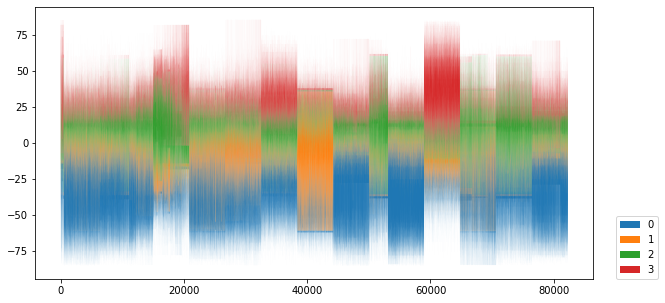

In [19]:
# Vizualization to present the distribution of topics in the tweets

x_axis = list(range(0,len(claims)))
y_axis = topics

fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [20]:
# Creating a list of words that are assciated with the topic Covid to create a lexicon from there
topic_0 = list()
for topic_idx, topic in enumerate(lda.components_):
    if topic_idx == 0:
        print("Topic %d:" % (topic_idx))
        topic_0.append(",".join([tm_feature_names[i]
                    for i in topic.argsort()[0:]]))

Topic 0:


In [21]:
# All the words associated with COVID according to the topic modeling algorithm 
topic_0
#Words in Covid related tweets

['taeyeon,keisha,lance,krw,spao,instalment,bottoms,merchandise,georgias,confronted,laundering,watsapp,avpltrendonjan11th,avpl,vaikunthapurram,jon,groundwork,ossoff,coowner,keyword,ahgases,shoe,defooo,wnba,polling,boyfriends,jumps,chapter,unis,gif,upheld,valentines,senator,pushpa,survives,congratulate,kelly,degrees,dow,proceeds,earning,legends,atlanta,congratulations,tied,2017,warnock,hmrc,loeflers,upped,got7,antis,runoff,boyfriend,standing,unveil,justice,nasdaq,poll,assignments,nations,georgia,dark,insurrection,abandoned,collaboration,marking,lmao,origins,animals,twin,victory,attempted,coup,profile,teaching,sucks,percent,depended,incited,freq,mudinjaathodasolrapaapom,stand,blm,source,pray,cnn,capitol,immigration,movement,rally,violent,united,superfluous,notion,wage,climate,income,joe,abrams,senate,organization,trends,race,dems,mission,context,type,market,extreme,stacey,loser,stocks,investing,donated,fight,guard,donald,healthcare,supporters,wild,states,manufactured,played,democrats,symp

##### Lexicon for COVID that is created by using the words from topic modeling and clustering as reference

In [22]:
#removed words that are not related to covid to get more preicise set of tweets that directly talk about Covid
cov_lex = ['survives, symptomatic, tears, dead, reported, zone, survival, rate, caused, high, lockdown, recovery, risk, rising, coronavirus, daily, resources, updates, expected, confirmed, infection, care, chinese, cases, experts, research, rise, pcr, rules, raise, airport, public, capacity, location, vaccination, planning, vaccinated, release, data, disease, china, ill, flu, total, hands, infectious, highest, reports, growth, asymptomatic, strong, beds, pandemicnothing, dr, life, rates, plans, stage, companies, growing, human, received, vaccinations, families, corona, mental, parents, waiting, vulnerable, wave, shot, dying, infected, science, emergency, update, rapid, die, distributing, increase, 19, crisis, supply, receive, food, essential, learn, deaths, airports, self, losing, numbers, distance, effective, age, cause, guidelines, death, treatment, sick, worst, mandatory, contact, save, family, hospitals, physical, measures, ways, patients, advice, report, needed, plan, share, healthy, safety, moderna, number, vaccinate, community, symptoms, company, information, fast, air, doses, soon, hospital, distancing, check, tested, tests, negative, control, lockdowns, restrictions, workers, case, continue, medical, nhs, distribution, prevent, social, health, safe, vaccines, battle, masks, awareness, test, wearing, virus, face, help, pandemic, wear, spread, covid, covid19, quarantine, testing, vaccine, mask']

In [23]:
#Total number of words in the COVID lexicon
topic0_l = list(str(cov_lex).split(","))
len(topic0_l)


165

In [24]:
#Matching words from the lexicon created to the tweets to slice covid related tweets
covid = list()
for i in range(0,len(tweets)):
    for j in range(0,len(topic0_l)):
        if topic0_l[j] in tweets[i]:
            covid.append(tweets[i])
            break


In [25]:
# Total tweets related to COVID. This includes duplication of tweets which we will counter in the later stage
len(covid)

65626

In [26]:
covid[:10]

['we can adjust by population to get crude excess death rates 2020 will also be the highest since 1940 even with measures taken to limit covid spread 2020 will still top 1951 the year of a major flu epidemic without all our efforts 2020 could have been much worse 911',
 'turning to labour or remainers like what would you do different while sat on one of the worst economic recessions amp death rates in the g7 its like driving a car off a cliff amp while youre falling offering the wheel to the guy in the passenger seat go on you fix it',
 'numbers of deaths are affected by population size we can also consider death rates as a proportion of the population crude death rates are shown below all improvements in the first decade of this century will be reversed this year spanish flu did the same in 1918 611',
 'here is a list of governors who preside over states with higher deathpermillion rates than fls ron desantis whom the media have anointed public enemy 1 1 murphy d 2 cuomo d 3 baker r 4

In [27]:
# Creating data frame with tweets only realted to COVID
C_tweets = p.DataFrame(covid, columns = ['tweets'])

## Sentiment Analysis Through Vader

In [28]:
# importing vader to perform sentiment analysis on the COVID related tweets
analyzer = SentimentIntensityAnalyzer()

In [29]:
# creating four columns that collect the polarity of the tweets
C_tweets['compound'] = [analyzer.polarity_scores(x)['compound'] for x in C_tweets['tweets']]
C_tweets['neg'] = [analyzer.polarity_scores(x)['neg'] for x in C_tweets['tweets']]
C_tweets['neu'] = [analyzer.polarity_scores(x)['neu'] for x in C_tweets['tweets']]
C_tweets['pos'] = [analyzer.polarity_scores(x)['pos'] for x in C_tweets['tweets']]

In [30]:
# This is how the dataframe looks like with scores for each tweet
C_tweets

,tweets,compound,neg,neu,pos
0,we can adjust by population to get crude exces...,-0.9152,0.225,0.745,0.030
1,turning to labour or remainers like what would...,-0.6808,0.153,0.767,0.080
2,numbers of deaths are affected by population s...,-0.9246,0.262,0.700,0.038
3,here is a list of governors who preside over s...,-0.5423,0.067,0.933,0.000
4,convince me with facts on death rates and infe...,-0.4404,0.281,0.576,0.144
...,...,...,...,...,...
65621,this could be us but yall dont wanna go on loc...,0.0000,0.000,1.000,0.000
65622,this could be us but yall dont wanna go on loc...,0.0000,0.000,1.000,0.000
65623,covid 19 grey black dust mask activated antipo...,0.0516,0.000,0.926,0.074
65624,imagine if the energy people put into complain...,0.4703,0.162,0.624,0.214


### Visualize the distribution of sentiment over the covid tweets

(array([ 4071.,  4591.,  5313.,  4739., 14881.,  3520.,  6393.,  7648.,
         9626.,  4844.]),
 array([-9.841e-01, -7.872e-01, -5.903e-01, -3.934e-01, -1.965e-01,
         4.000e-04,  1.973e-01,  3.942e-01,  5.911e-01,  7.880e-01,
         9.849e-01]),
 <a list of 10 Patch objects>)

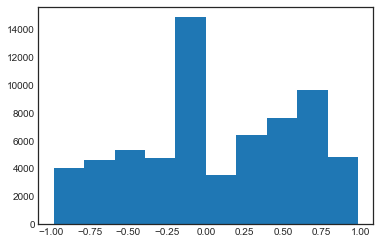

In [31]:
# Creating a histogram of positive/negative tweets identified through compound
plt.style.use('seaborn-white')
plt.hist(C_tweets["compound"])

C:\Users\Divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


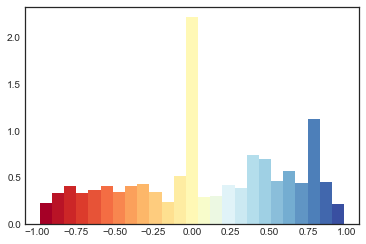

In [32]:
# Creating another histogram with color variation of tweets moving from negative to positive
cm = plt.cm.RdYlBu
n, bins, patches = plt.hist(C_tweets["compound"], 25, normed=1, color='green')
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/25)) # notice the i/25
 
plt.show()

### Finding out the top words in positive Covid related Tweets

In [33]:
# Filtering tweets that have a positive probability of above 0.5
Covid_t_p = C_tweets[C_tweets.pos > 0.5]['tweets'].tolist()

In [34]:
# Removing duplicate tweets and keeping only unique ones
Covid_t_p = set(Covid_t_p)

In [35]:
# Finding the frequency of words in positive tweets
def get_top_n_words(corpus, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_cp_words = get_top_n_words(Covid_t_p, 50)
for word, freq in common_cp_words:
    print(word, freq)

spread 27
love 24
lockdown 14
good 14
quarantine 14
hobi 11
happy 10
help 10
covid 10
safe 9
testing 9
care 8
thank 8
happiness 7
great 7
covid19 7
best 7
like 7
vaccine 7
hope 7
travel 6
new 6
lol 6
thanks 6
free 6
day 6
positivity 6
share 6
mask 6
yes 6
year 5
kindness 5
stay 5
communism 5
enjoy 4
lets 4
amazing 4
gt 4
support 4
people 4
wear 4
rt 4
make 4
wow 3
stock 3
market 3
socialism 3
pandemic 3
beauty 3
angel 3


In [36]:
# Preparing a dictionary for the wordcloud
common_cp_words_d = dict(common_cp_words)

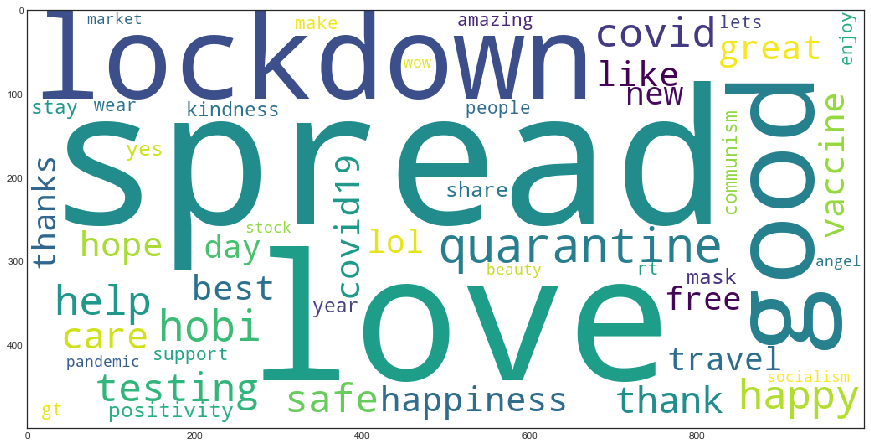

In [37]:
# Creating the word cloud of the words that are there in positive tweets
wordcloud = WordCloud(width = 1000, height = 500,  background_color="white").generate_from_frequencies(common_cp_words_d)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [38]:
# observing the positive tweets in the dataframe
set(list(C_tweets[C_tweets.pos > 0.5]['tweets']))

{' full details are on our dedicated help page gt andy',
 '1111 prayers justice for sushant disha jiah and other innocent lives happiness and good health to ssrians spread positivity and love penalisessrkillers',
 '14 days to go spread love and positivity show your love and support for sushant penalisessrkillers',
 '25 thank you god for allowing me to see this new year super love my loved ones for making this a special quarantine birthday capszn',
 'airtel i love to spread love',
 'amazing amazing spread',
 'and enjoy your vaccine',
 'and with every entry you are entered to win a free copy of covid19 good luck',
 'badds new beauty video just dropped and shes amazing is it worth the hype testing truly beauty products badd angel review',
 'being a 14th finance employee thanks for giving us the new year gift the best gift of our life happyunemploymenttous',
 'best large airport',
 'best of 2020 lets make the next year great lets all spread love positivity happiness and be the best version

### Finding out the top words in neutral Covid related Tweets

In [39]:
# Filtering tweets that have a neutral probability of above 0.5
Covid_t_nu = C_tweets[C_tweets.neu > 0.5]['tweets'].tolist()

# Removing duplicate tweets and keeping only unique ones
Covid_t_nu = set(Covid_t_nu)

In [40]:
# Finding the frequency of words in Neutral tweets
common_cp_words = get_top_n_words(Covid_t_nu, 50)
for word, freq in common_cp_words:
    print(word, freq)

covid 4064
lockdown 3967
people 3772
pandemic 3665
vaccine 3562
covid19 3448
amp 3129
testing 2952
quarantine 2943
mask 2570
just 2375
travel 2369
new 2101
dont 2098
economy 1933
like 1933
spread 1922
time 1634
im 1543
need 1496
coronavirus 1454
market 1354
stock 1263
jobs 1204
help 1171
know 1164
work 1147
home 1109
health 1101
year 1095
government 1093
going 1087
uk 1014
day 1006
wear 998
make 997
think 940
virus 936
test 925
want 916
today 895
good 859
country 841
unemployment 826
cases 802
president 798
right 747
stay 740
days 738
world 734


In [55]:
# observing the neutral tweets in the dataframe
#set(list(C_tweets[C_tweets.neu > 0.5]['tweets']))

### Finding out the top words in negative Covid related Tweets

In [42]:
# Filtering tweets that have a negative probability of above 0.5
Covid_t_n = C_tweets[C_tweets.neg > 0.5]['tweets'].tolist()

# Removing duplicate tweets and keeping only unique ones
Covid_t_n = set(Covid_t_n)

In [43]:
# Finding the frequency of words in Negative tweets
common_cp_words = get_top_n_words(Covid_t_n, 50)
for word, freq in common_cp_words:
    print(word, freq)

covid 17
quarantine 14
unemployment 13
fuck 11
lockdown 10
worst 7
killing 7
hell 6
im 5
poverty 5
death 5
mask 4
fear 4
illness 4
vaccine 4
testing 4
stop 4
rates 4
damn 3
pandemic 3
bitch 3
time 3
just 3
shame 3
virus 3
covid19 3
shit 3
coronavirus 3
increases 3
tired 3
people 3
charges 2
lies 2
hate 2
lockdown3 2
cases 2
like 2
cancer 2
homelessness 2
worse 2
scam 2
ddo 2
tank 2
shield 2
blocking 2
rate 2
crisis 2
uk 2
boring 2
president 2


In [44]:
# observing the negative tweets in the dataframe
set(list(C_tweets[C_tweets.neg > 0.5]['tweets']))

{'a tragedy of indecision lockdown lockdown3',
 'bitch im ready to go on motherfucking lockdown yall backwards as hell',
 'blame lockdown',
 'blatant lies inflated death rates keeping the lockdown going depressing times',
 'businesses fear covid lockdown catastrophe as sunak aid package fails',
 'classic covid denier',
 'covid is just one illness among many locking down society to fight a single illness causes other problems like undiagnosed cancer and heart disease obesity poverty unemployment homelessness mental illness domestic abuse the cure is worse than the illness',
 'curse you covid',
 'damn quarantine is kinda boring without my pc lol',
 'ddo tank testing elite killing time shield blocking',
 'ddo tank testing r1 killing time shield blocking',
 'ded uk lockdown is boring as hell',
 'dolly parton killing covid colourised',
 'dudewere in the middle of a devastating pandemic you dumb loser fuck',
 'fbi warns against covid19 vaccine scams',
 'fuck covid',
 'fuck masks fuck quarant

In [45]:
# Preparing a dictionary for the wordcloud
common_cp_words_nd = dict(common_cp_words)

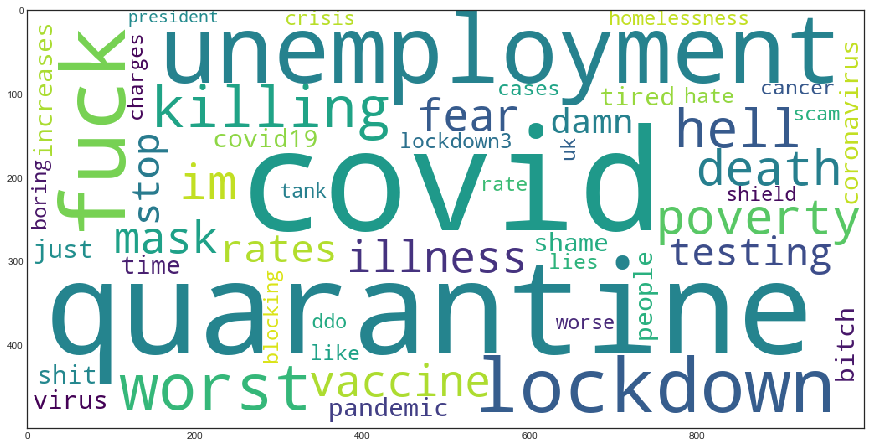

In [46]:
# Creating the word cloud of the words that are there in negative tweets
wordcloud = WordCloud(width = 1000, height = 500,  background_color="white").generate_from_frequencies(common_cp_words_nd)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

### Exploring what relationships people mention in Covid related tweets

In [65]:
# read in all people words
import pandas as pd
people = pd.read_csv('people-dict.csv', header=None)
people.rename(columns={0:'relation'},inplace=True)
relations = people['relation']
print(relations[0])

aunt


In [66]:
#Counting the number of times a relation is mentioned in COvid related tweets
tf = dict()
for relation in relations:
    tf[relation] = 0
    for twe in covid:
        occ = re.findall(r'\b' + relation + r'\b',twe.lower())
        tf[relation] = tf[relation] + len(occ)
tf['someone']

607

In [67]:
# Sorting the relation words in descending order and viewing the top 10 relationships
sorted_tf = sorted(tf.items(), key=operator.itemgetter(1), reverse=True)
sorted_tf[:10]

[('people', 8139),
 ('them', 3196),
 ('everyone', 1306),
 ('boyfriend', 1017),
 ('boyfriends', 991),
 ('[\\w]*mate(s?)', 782),
 ('family', 758),
 ('friends', 696),
 ('someone', 607),
 ('children', 553)]

In [68]:
# Preparing a dictionary for the wordcloud
sorted_tf = dict(sorted_tf)

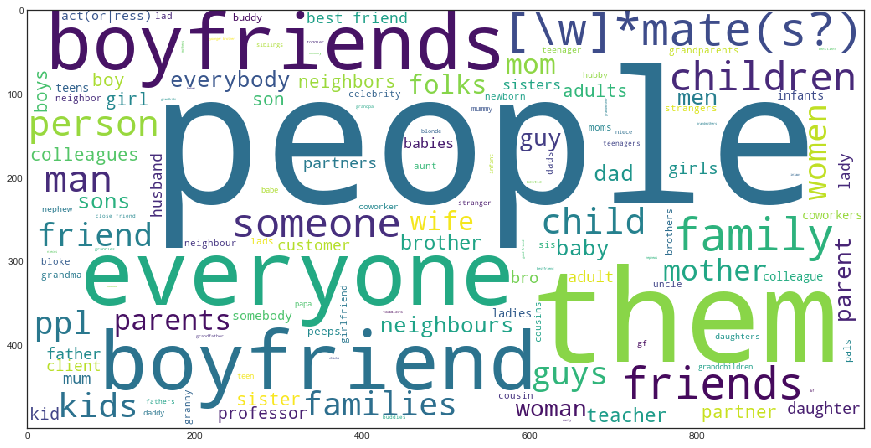

In [69]:
# Creating the word cloud of the relationships that people talk about in tweets related to COVID
wordcloud = WordCloud(width = 1000, height = 500,  background_color="white").generate_from_frequencies(sorted_tf)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)